In [1]:
# !pip list

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('teleCust1000t.csv')

In [4]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Subscriptions vs Customer Age

In [6]:
age_cust_df = df.groupby('age')['custcat'].count().reset_index()

Text(0.5, 1.0, 'Total Subscriptions according to Customer Age')

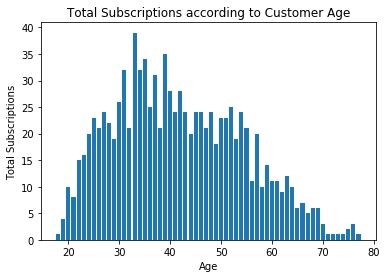

In [7]:
plt.bar(age_cust_df['age'],age_cust_df['custcat'])
plt.xlabel('Age')
plt.ylabel('Total Subscriptions')
plt.title('Total Subscriptions according to Customer Age')

### Top 5 Customer Age with Highest Subscriptions

In [8]:
df.groupby('age')['custcat'].count().reset_index().sort_values('custcat',ascending=False).head()

,age,custcat
15,33,39
21,39,35
17,35,34
16,34,32
13,31,32


### Subscriptions Count

In [9]:
df.groupby('custcat')['age'].count()

custcat
1    266
2    217
3    281
4    236
Name: age, dtype: int64

In [10]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### Feature Engineering

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [24]:
X = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values

In [20]:
y = df['custcat'].values

In [25]:
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [27]:
from sklearn import preprocessing

In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [34]:
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
y_hat = knn_class.predict(X_test)

In [55]:
f1_score(y_test,y_hat,average='micro')

0.315

In [49]:
accuracy_score(y_test,y_hat)

0.315

### Choosing Appropriate K (1 : 10) with Highest Accuracy Score

In [57]:
acc_score = []
for k in range(1,100):
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(X_train,y_train)
    y_hat = knn_class.predict(X_test)
    acc_score.append(f1_score(y_test,y_hat,average='micro'))


In [58]:
acc_score

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33]

In [61]:
n_knn_df = pd.DataFrame({'n':np.arange(1,11),'acc_score':acc_score})

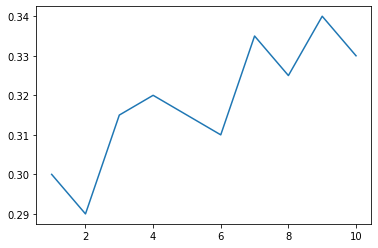

In [64]:
plt.plot(n_knn_df['n'],n_knn_df['acc_score'])

### Choosing Appropriate K (1: 100) with Highest Accuracy Score

In [67]:
acc_score = []
for k in range(1,101):
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(X_train,y_train)
    y_hat = knn_class.predict(X_test)
    acc_score.append(accuracy_score(y_test,y_hat))

In [69]:
n_knn_df_large = pd.DataFrame({'n':np.arange(1,101),'acc_score':acc_score})

In [70]:
n_knn_df_large

,n,acc_score
0,1,0.300
1,2,0.290
2,3,0.315
3,4,0.320
4,5,0.315
...,...,...
95,96,0.335
96,97,0.345
97,98,0.325
98,99,0.315


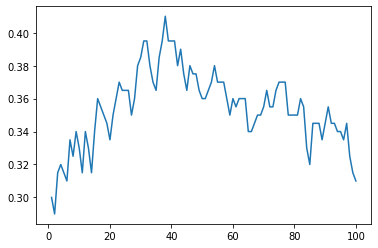

In [71]:
plt.plot(n_knn_df_large['n'],n_knn_df_large['acc_score'])